In [1]:
import numpy as np
import random as r
import matplotlib.pyplot as plt
import scipy.signal as s
from math import sin, cos, exp, sqrt, cosh, log, pi
import math 

import statsmodels.api as sm
lowess = sm.nonparametric.lowess



def eval_P(X):
    return np.trapz(X**2)

## Задача 1
На цифровой сигнал подается БГШ (белый гаусс. шум). Пропускаем через фильтр Баттерворта. 
Рассчитать отношения мощностей до и после фильтрации.

В работе используются два фильтра:
фильтр Баттерворта и встроенный в пакет scipy.signal lowess

In [2]:
n = 100
X = np.transpose([*np.zeros(n), *np.ones(n),*np.zeros(n)])
S = np.random.random((1,3*n))
sigma = 0.3
Y = X + sigma*S
b,a = s.butter(3, 0.2, 'lowpass')

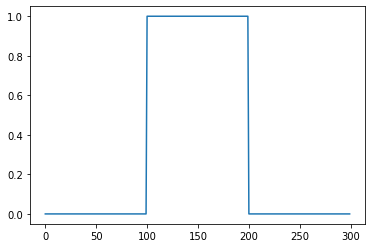

In [3]:
plt.plot(X)

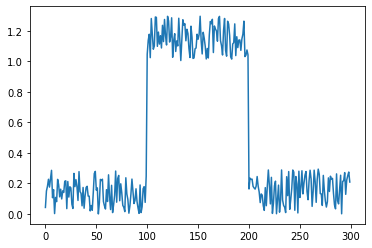

In [4]:
plt.plot(Y[0]);

98.80312306887612


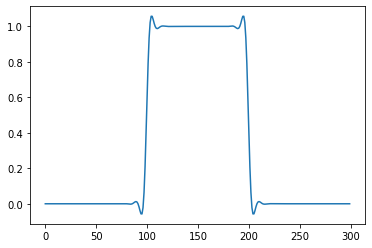

In [5]:
# ПРИМЕНЕНИЕ ФИЛЬТРА К ИСТИННОМУ СИГНАЛУ:
FILTER_ORIG = s.filtfilt(b, a, X)
plt.plot(s.filtfilt(b, a, X))
P = eval_P(FILTER_ORIG)
print(P)


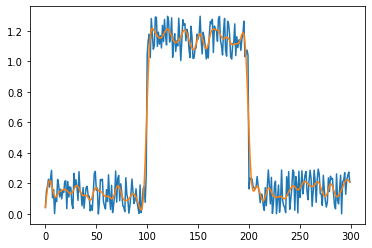

In [6]:
plt.plot(Y[0])
Filt = s.filtfilt(b, a, Y[0])
plt.plot(s.filtfilt(b, a, Y[0]))

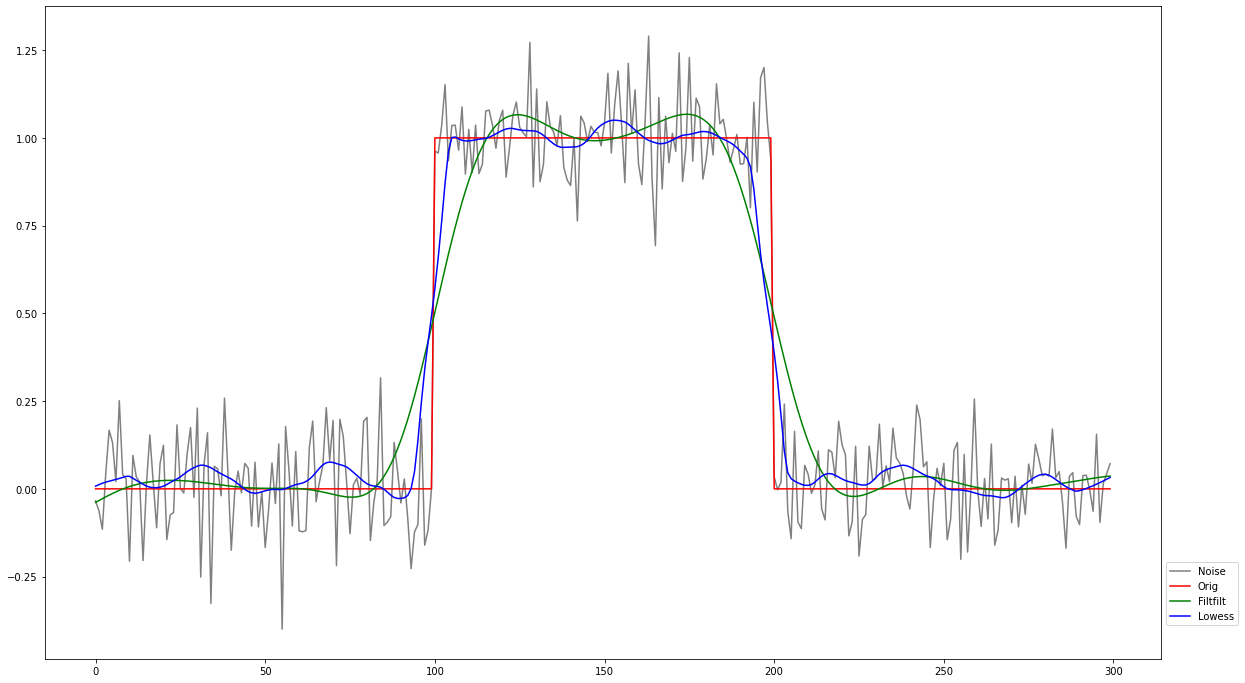

In [58]:
n = 100
# создаём шум
X = np.transpose([*np.zeros(n), *np.ones(n),*np.zeros(n)])
N = 0.5
F_max = 0.1
sigma = math.sqrt(0.3 * N * F_max)

S = np.random.standard_normal(3*n)
X_new = X + sigma*S

# filtfilt
cutoff_freq = 0.04
b,a = s.butter(3,cutoff_freq, btype='low', analog=False)#'lowpass')    
filtered = s.filtfilt(b, a, X_new)

# lowess
Y = np.arange(1, 301)
result = lowess(X_new, Y, frac=0.07)
y_smooth = result[:,1]


# графики
fig = plt.figure(figsize=(20,12))
plt.plot(X_new, color = 'gray', label = 'Noise')
plt.plot(X, color = 'red', label = 'Orig')

plt.plot(filtered, color = 'green', label = 'Filtfilt')
plt.plot(y_smooth, color = 'blue', label = 'Lowess')
#plt.plot(pressure_smooth, color = 'red')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.1))   

In [54]:
# ПОДСЧЕТ ОТНОШЕНИЯ МОЩНОСТЕЙ ОТФИЛЬТРОВАННЫЙ СИГНАЛ К ЧИСТОМУ (ИСХОДНОМУ) 
P_signal = n
P_noise_butter = eval_P(filtered) # мощность = интеграл
P_noise_lowess = eval_P(y_smooth)

In [55]:
print("ОТНОШЕНИЕ ЧИСТОГО К БАТТЕР")
10 * np.log10(P_signal/P_noise_butter)


ОТНОШЕНИЕ ЧИСТОГО К БАТТЕР


0.2510723885747587

In [56]:
print("ОТНОШЕНИЕ ЧИСТОГО К LOWESS")
10 * np.log10(P_signal/P_noise_lowess)

ОТНОШЕНИЕ ЧИСТОГО К LOWESS


0.17188722053146588

In [57]:
print("ОТНОШЕНИЕ ЧИСТОГО К ШУМУ")
10 * np.log10(P_signal/eval_P(X_new))

ОТНОШЕНИЕ ЧИСТОГО К ШУМУ


-0.21950748012632332

Как видим, после фильтрации, отношения мощностей увеличилось